# SMAI Assignment - 2

## Question - `1` : Clustering

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

**About the dataset:**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image. You can check out the dataset here: https://www.kaggle.com/datasets/zalando-research/fashionmnist

1a) Load the dataset and use the K Means algorithm **(You are allowed to use the library)**. You need to find the optimal number of clusters using the
> i) elbow method
    >> Plot the graph between average distance and the number of clusters graph while using the elbow method. Report the optimal number of clusters found. Implement this method on your own.

> ii) silhoette method
    >> Plot the graph between silhoutte score and number of clusters using silhoette method. Report the optimal number of clusters found. You can use the functions provided by sklearn.metrics.

1b) Experiment with different cluster initialisation methods [k-means++, forgy ("random" in sklearn)]. (init parameter in KMeans class) 


1c) Visualize the dataset to depict the clusters formed. Here you can leverage methods like PCA to reduce the data to 2-3 dimensions and visualize using scatter plots. Color the points according to the clusters (you can use T-SNE or any other matplotlib method)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

Visualize the clusters obtained using these linkages and compare. 

</br>
</br>
</br>
</br>

**Part 3:**
</br>
In this part, we’ll implement kmeans to compress an image. In an original image each pixel has 3 8-bit integers, therefore the size of the image is **3 x height x width x 8**. Our task is to compress the image where it only comprises of **k** unique colors, where k = number of clusters formed by the algorithm where each pixel is a 3D datapoint. Therefore the new compressed image can be stored in **k x 24 + width x height x b**. (b -> number of bits used to represent the integer *k*, since each pixel will have a color value from 0 to k-1). Now your task is to experiment with different values of k (atleast 3) and show the compressed image along with the value of data reduction (in terms of bits). 

(an example image has been provided in the folder)

## Part1: K Means

10K images flattened:  (10000, 784)  and 10k labels:  (10000,)


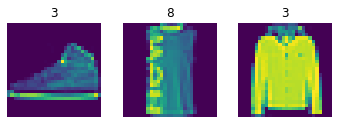

In [12]:
# LOADING THE DATASET. Take only the test split (10000 samples)
from keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
X = testX.reshape(testX.shape[0] , -1)
y = np.copy(testy)
print("10K images flattened: " , X.shape , " and 10k labels: " , y.shape)

def display_random_images(num_images):
    plt.figure(figsize=(10,10))
    for i in range(num_images):
        plt.subplot(5,5,i+1)
        plt.imshow(X[np.random.randint(0,10000)].reshape(28,28))
        plt.title(y[np.random.randint(0,10000)])
        plt.axis('off')
    plt.show()
display_random_images(3)

Scaled data shape:  (10000, 784)


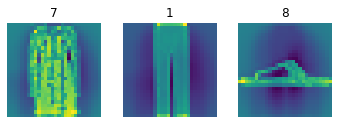

In [13]:
# Perform KMeans using sklearn's KMeans. (Perform appropriate scaling)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#scaling the data
print("Scaled data shape: ", X_scaled.shape)
def display_random_images(num_images):
    plt.figure(figsize=(10,10))
    for i in range(num_images):
        plt.subplot(5,5,i+1)
        plt.imshow(X_scaled[np.random.randint(0,10000)].reshape(28,28))
        plt.title(y[np.random.randint(0,10000)])
        plt.axis('off')
    plt.show()
display_random_images(3)

Generating k =  2
Generating k =  3
Generating k =  4
Generating k =  5
Generating k =  6
Generating k =  7
Generating k =  8
Generating k =  9
Generating k =  10
Generating k =  11
Generating k =  12
Generating k =  13
Generating k =  14
Generating k =  15
Generating k =  16
Generating k =  17
Generating k =  18
Generating k =  19
Generating k =  20


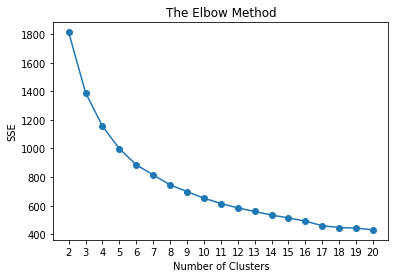

In [14]:
# Visualize the results from elbow method and silhoutte method. (Vary the value of k from around 2-3 to 20)
#Implementing elbow method
def elbow(X_scaled):
    sse = []
    kmax = 20
    for k in range(2, kmax+1):
        print("Generating k = " , k)
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(X_scaled)
        distances = []
        for i in range(k):
            distances.append(np.linalg.norm(X_scaled[kmeans.labels_ == i] - kmeans.cluster_centers_[i]))
        sse.append(sum(distances)/len(distances))
    plt.plot(range(2, kmax+1), sse, marker='o')
    plt.title('The Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.xticks(range(2, kmax+1))
    plt.show()
elbow(X_scaled)

Generating k =  2
Generating k =  3
Generating k =  4
Generating k =  5
Generating k =  6
Generating k =  7
Generating k =  8
Generating k =  9
Generating k =  10
Generating k =  11
Generating k =  12
Generating k =  13
Generating k =  14
Generating k =  15
Generating k =  16
Generating k =  17
Generating k =  18
Generating k =  19
Generating k =  20


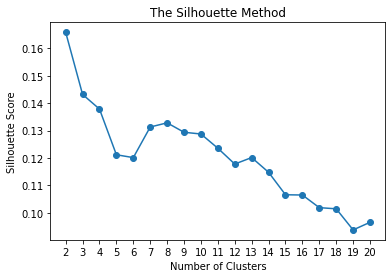

In [15]:
from sklearn.metrics import silhouette_score
#Implementing Silhouetter Score method
def silhouette(X_scaled):
    sil = []
    kmax = 20
    for k in range(2, kmax+1):
        print("Generating k = " , k)
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(X_scaled)
        labels = kmeans.labels_
        sil.append(silhouette_score(X_scaled, labels, metric='euclidean'))
    plt.plot(range(2, kmax+1), sil, marker='o')
    plt.title('The Silhouette Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.xticks(range(2, kmax+1))
    plt.show()

silhouette(X_scaled)

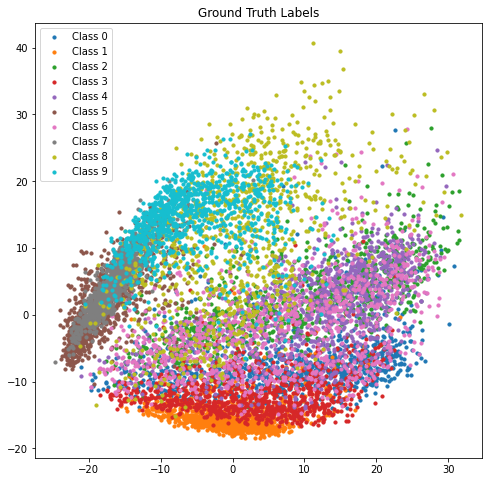

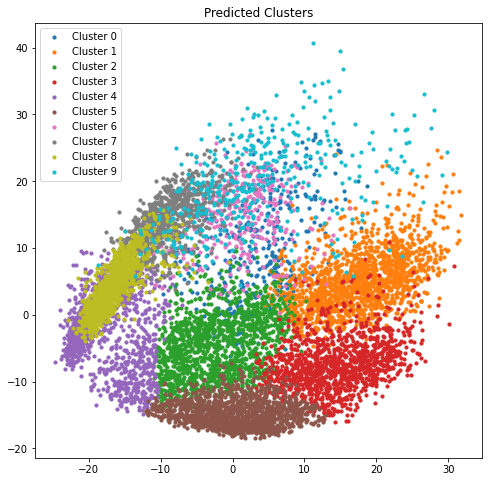

In [16]:
# Visualize the clusters formed by Kmeans (Use PCA to reduce dimensions and plot scatter plot. You can show the original ground truth labels in one plot and then the predicted clusters in another plot)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Scatter Plot of ground truth labels
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.scatter(X_pca[testy == i, 0], X_pca[testy == i, 1], s=10, label=f"Class {i}")
plt.title("Ground Truth Labels")
plt.legend()
plt.show()

#Scatter Plot of the predicted clusters
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], s=10, label=f"Cluster {i}")
plt.title("Predicted Clusters")
plt.legend()
plt.show()

## Part2: Hierarchical clustering

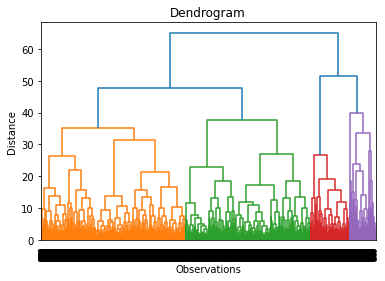

In [17]:
# implement hierarchical clustering ( you can use scikit module)
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sys

def dendogram(data, linkage):
    dendrogram = sch.dendrogram(sch.linkage(data, method=linkage))
    plt.title('Dendrogram')
    plt.xlabel('Observations')
    plt.ylabel('Distance')
    plt.show()
    

dendogram(X_pca,'complete')

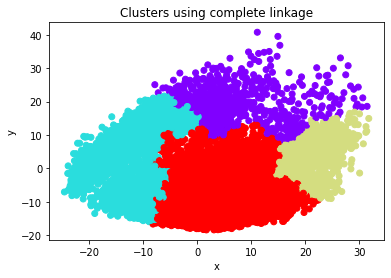

In [18]:
def hierarchical_clustering(data, n_clusters):
    clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
    clusters = clustering.fit_predict(data)
    return clusters

complete_cluster = hierarchical_clustering(X_pca, 4)

plt.scatter(X_pca[:,0], X_pca[:,1], c=complete_cluster, cmap='rainbow')
plt.title('Clusters using complete linkage')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

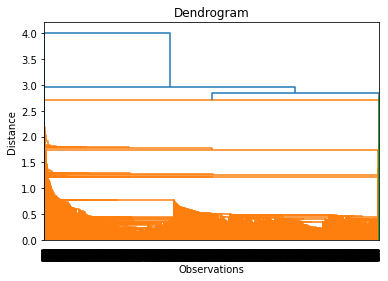

In [19]:
dendogram(X_pca,'single')


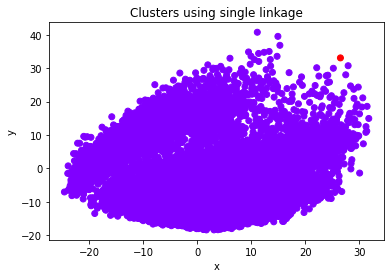

In [20]:
single_cluster = hierarchical_clustering(X_scaled, 2)

plt.scatter(X_pca[:,0], X_pca[:,1], c=single_cluster, cmap='rainbow')
plt.title('Clusters using single linkage')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: We seek for the biggest vertical distance in our dendrogram graph that does not intersect any horizontal line to estimate the number of clusters. The "cutting line" designates this separation and serves as its visual representation.

1. Search for the dendrogram's longest vertical line that doesn't cross any horizontal axes.
2. At that location, we draw a horizontal line.
3. The number of vertical lines that cross the horizontal line is to be counted.
4. The quantity of clusters is determined by how many vertical lines cross the horizontal line.

**NOTE:** Depending on how much horizontal value variance we allow for, we can discuss whether to have 2 or 4 clusters for the entire link.




**Question:** Mention the differences observed using single and complete linkage:

Answer: Complete connectivity allows us to simply determine the horizontal axis value and see the dendogram graph in detail.

The dendogram produced by single linkage, in contrast, doesn't appear to be as clear. The decision to have only two clusters can be made through visualisation. When those clusters are plotted, we discover that just one data point belongs to one cluster while the rest are distributed throughout the other clusters.


## Part3: Image Compression

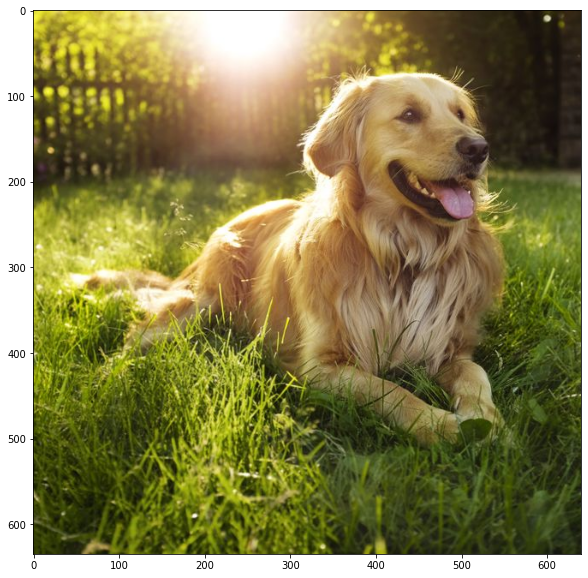

In [21]:
import cv2

img = cv2.imread('dog.jpg') #reading the input image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #converts BGR to RGB format, more standard ig
img_size = img.shape #size of image: (height, width, depth)

# Reshaping it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

plt.figure(figsize=(10, 10))
plt.imshow(img) #displaying the image

Image compressed using 2 colors. 9347152 bits saved due to compression.


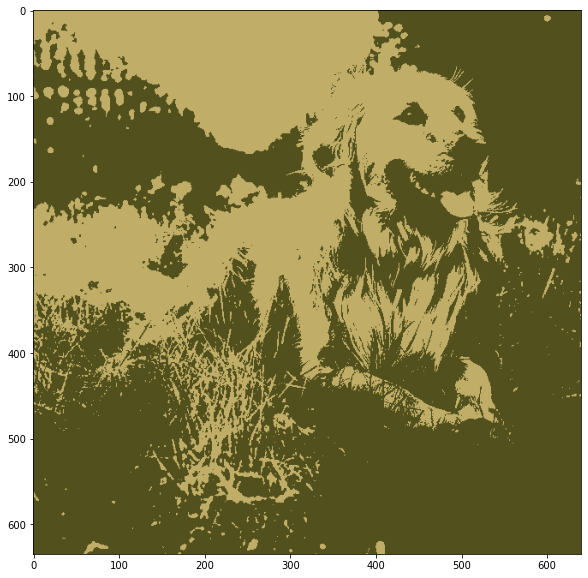

Image compressed using 16 colors. 8127616 bits saved due to compression.


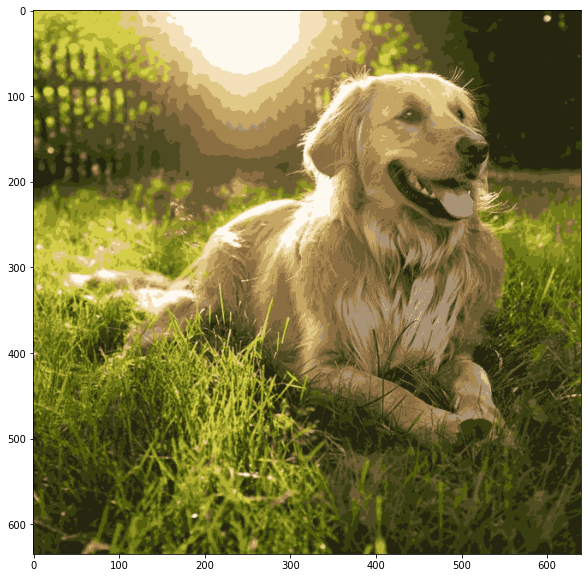

Image compressed using 64 colors. 7313664 bits saved due to compression.


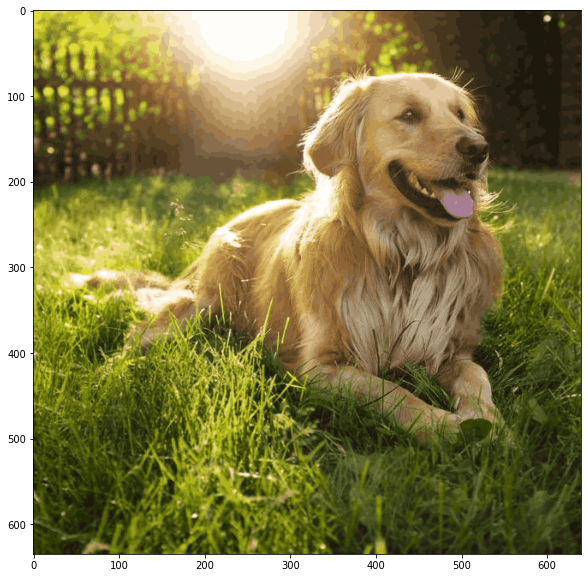

In [22]:
def compress_img(img, num_clusters):
    img_size = img.shape
    X = img.reshape(img_size[0] * img_size[1], img_size[2])
    compressed_images = {} #to store the image and bits 
    for k in num_clusters:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(X) #Fitting the data to the KMeans
        
        compressed_img = kmeans.cluster_centers_[kmeans.labels_] #obtaining compressed image through centeroid replacement
        compressed_img = np.clip(compressed_img.astype('uint8'), 0, 255) #clip or restrict values between 0 tp 255
        compressed_img = compressed_img.reshape(img_size[0], img_size[1], img_size[2]) #reshaping to original form
        
        orig_bits = img_size[0] * img_size[1] * img_size[2] * 8 #no of bits needed to represent the original image
        compressed_bits = k * 24 + img_size[0] * img_size[1] * int(np.ceil(np.log2(k))) #no of bits used to represent the compressed image
        bits_saved = orig_bits - compressed_bits #no of bits saved due to compression
        
        compressed_images[k] = (compressed_img, bits_saved)
    return compressed_images

compressed_images = compress_img(img, [2, 16, 64])
for k, (compressed_img, bits_saved) in compressed_images.items():
    print(f"Image compressed using {k} colors. {bits_saved} bits saved due to compression.")
    plt.figure(figsize=(10, 10))
    plt.imshow(compressed_img)
    plt.show()